In [1]:
#lets start 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1= pd.read_csv('CSED_t.csv')
df2= pd.read_csv('Admin_t.csv')
df3= pd.read_csv('design_lab_t.csv')
df1.head()




,timestamp,ENERGY,VOLTAGE,PF,FREQUENCY,POWER,CURRENT
0,2024-03-25 05:28:56,889.05,251.6,0.0,50.0,0.0,0.0
1,2024-03-25 05:28:29,889.05,251.8,0.0,50.0,0.0,0.0
2,2024-03-25 05:28:01,889.05,251.7,0.0,50.0,0.0,0.0
3,2024-03-25 05:27:06,889.05,252.1,0.0,50.0,0.0,0.0
4,2024-03-25 05:27:05,889.05,252.3,0.0,50.0,0.0,0.0


In [2]:
# add Source Label
df1['Source']= 'CSED BLOCK'
df2['Source']= 'Admin block'
df3['Source']= '3D-LAB'
df1.head()

,timestamp,ENERGY,VOLTAGE,PF,FREQUENCY,POWER,CURRENT,Source
0,2024-03-25 05:28:56,889.05,251.6,0.0,50.0,0.0,0.0,CSED BLOCK
1,2024-03-25 05:28:29,889.05,251.8,0.0,50.0,0.0,0.0,CSED BLOCK
2,2024-03-25 05:28:01,889.05,251.7,0.0,50.0,0.0,0.0,CSED BLOCK
3,2024-03-25 05:27:06,889.05,252.1,0.0,50.0,0.0,0.0,CSED BLOCK
4,2024-03-25 05:27:05,889.05,252.3,0.0,50.0,0.0,0.0,CSED BLOCK


In [3]:
df2.head()
df2.info()
df1.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2600 non-null   object 
 1   ENERGY     2600 non-null   float64
 2   VOLTAGE    2389 non-null   float64
 3   PF         1880 non-null   float64
 4   FREQUENCY  2562 non-null   float64
 5   POWER      1718 non-null   float64
 6   CURRENT    2277 non-null   float64
dtypes: float64(6), object(1)
memory usage: 142.3+ KB


,count,mean,std,min,25%,50%,75%,max
ENERGY,2028.0,887.235261,1.700913,884.01,885.75,887.505,889.05,889.05
VOLTAGE,602.0,252.593355,0.922012,251.00,251.90,252.300,253.40,254.90
PF,3000.0,0.597390,0.335566,0.00,0.46,0.780,0.78,0.99
FREQUENCY,2728.0,49.966312,0.056269,49.70,49.90,50.000,50.00,50.20
POWER,2051.0,891.346075,576.696994,0.00,0.00,1263.200,1264.90,1272.30
CURRENT,2355.0,4.816374,2.845211,0.00,0.00,6.490,6.51,6.57


In [4]:
#Data Concat to single frame

concatenated_df = pd.concat([df1, df2, df3], ignore_index=True)
concatenated_df.info()
#concatenated_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8600 non-null   object 
 1   ENERGY     7628 non-null   float64
 2   VOLTAGE    4206 non-null   float64
 3   PF         7555 non-null   float64
 4   FREQUENCY  8030 non-null   float64
 5   POWER      5301 non-null   float64
 6   CURRENT    7174 non-null   float64
 7   Source     8600 non-null   object 
dtypes: float64(6), object(2)
memory usage: 537.6+ KB


In [4]:
# objects columns to drop for skewness check - 
df =pd.DataFrame(concatenated_df)
cd=['timestamp','Source']
df.drop(cd, axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ENERGY     7628 non-null   float64
 1   VOLTAGE    4206 non-null   float64
 2   PF         7555 non-null   float64
 3   FREQUENCY  8030 non-null   float64
 4   POWER      5301 non-null   float64
 5   CURRENT    7174 non-null   float64
dtypes: float64(6)
memory usage: 403.2 KB


In [6]:
#skewness check for diffrent column
import matplotlib.pyplot as plt

for i in df.select_dtypes(include=np.number).columns:
    skew=df[i].skew()
    print(i,  skew)

ENERGY 1.0225424621749821
VOLTAGE 0.2895795491010397
PF -1.3238516184652498
FREQUENCY -0.1866736953030239
POWER 0.9992593826946583
CURRENT 1.1115614009965813


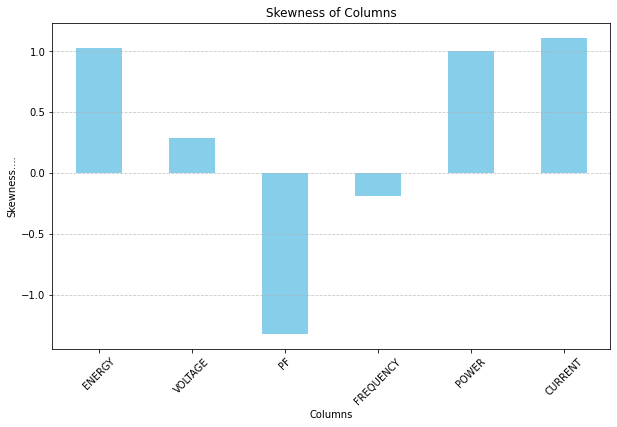

In [7]:
skewness = df.skew()
#....Plotting
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness....')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
#imputation according to skewness

#Miising /Null values finding Before Imputaions

concatenated_df.isna().sum()/len(concatenated_df)*100

timestamp     0.000000
ENERGY       11.302326
VOLTAGE      51.093023
PF           12.151163
FREQUENCY     6.627907
POWER        38.360465
CURRENT      16.581395
Source        0.000000
dtype: float64

In [9]:

# Imputations
concatenated_df['ENERGY'].fillna(concatenated_df['ENERGY'].median(), inplace=True)





concatenated_df['VOLTAGE'].fillna(concatenated_df['VOLTAGE'].median(), inplace=True)
concatenated_df['PF'].fillna(concatenated_df['PF'].median(), inplace=True)
concatenated_df['FREQUENCY'].fillna(concatenated_df['FREQUENCY'].mean(), inplace=True)
concatenated_df['POWER'].fillna(concatenated_df['POWER'].median(), inplace=True)
concatenated_df['CURRENT'].fillna(concatenated_df['CURRENT'].median(), inplace=True)

In [10]:
#Miising /Null values finding After Imputaions
concatenated_df.isna().sum()/len(concatenated_df)*100

timestamp    0.0
ENERGY       0.0
VOLTAGE      0.0
PF           0.0
FREQUENCY    0.0
POWER        0.0
CURRENT      0.0
Source       0.0
dtype: float64

In [67]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8600 non-null   object 
 1   ENERGY     8600 non-null   float64
 2   VOLTAGE    8600 non-null   float64
 3   PF         8600 non-null   float64
 4   FREQUENCY  8600 non-null   float64
 5   POWER      8600 non-null   float64
 6   CURRENT    8600 non-null   float64
 7   Source     8600 non-null   object 
dtypes: float64(6), object(2)
memory usage: 537.6+ KB


In [11]:
concatenated_df['timestamp'] = pd.to_datetime(concatenated_df['timestamp'])
concatenated_df['adjusted_timestamp'] = concatenated_df['timestamp'] + pd.Timedelta(hours=5, minutes=30)
concatenated_df.head()

,timestamp,ENERGY,VOLTAGE,PF,FREQUENCY,POWER,CURRENT,Source,adjusted_timestamp
0,2024-03-25 05:28:56,889.05,251.6,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:58:56
1,2024-03-25 05:28:29,889.05,251.8,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:58:29
2,2024-03-25 05:28:01,889.05,251.7,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:58:01
3,2024-03-25 05:27:06,889.05,252.1,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:57:06
4,2024-03-25 05:27:05,889.05,252.3,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:57:05


In [12]:
# peak Hour for consumption over all 

concatenated_df['hour'] = concatenated_df['adjusted_timestamp'].dt.hour

# Group by hour and calculate mean energy consumption for each hour
hourly_energy_consumption = concatenated_df.groupby('hour')['ENERGY'].mean()

# Find the peak hour
peak_hour = hourly_energy_consumption.idxmax()

print("Peak hour of energy consumption:", peak_hour)

Peak hour of energy consumption: 2


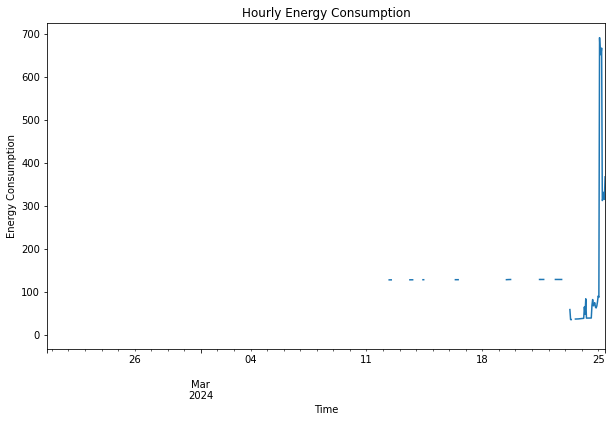

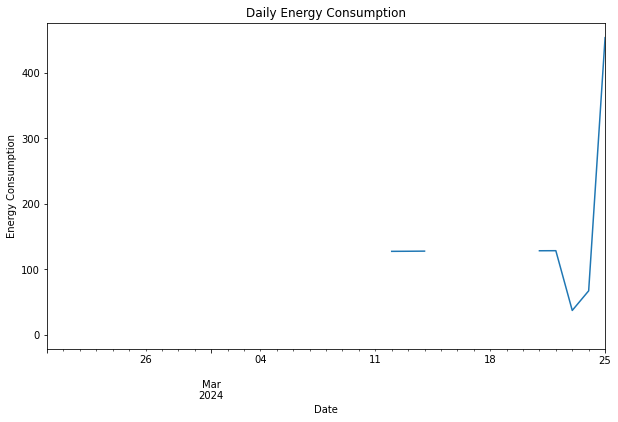

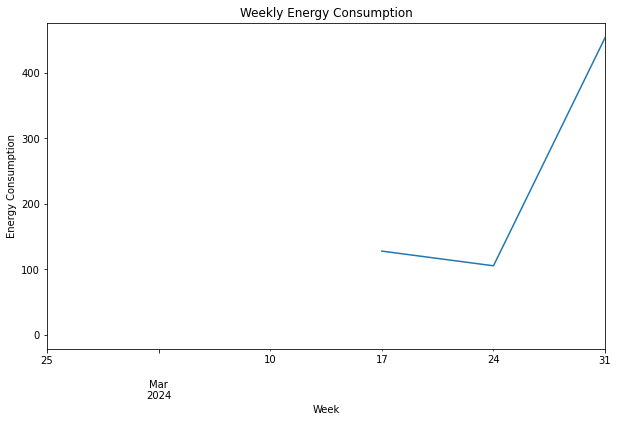

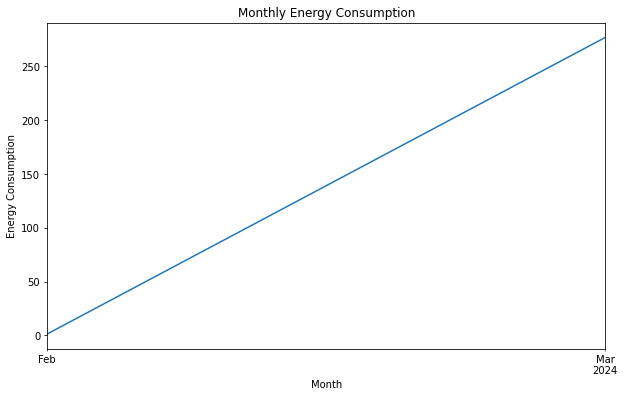

In [13]:
##consumption pattern Analysis hourly,Daily,monthly!

# Set 'timestamp' as the index of the DataFrame for easier time-based operations
concatenated_df.set_index('adjusted_timestamp', inplace=True)

# Resample the data to get hourly, daily, weekly, and monthly energy consumption
hourly_energy = concatenated_df['ENERGY'].resample('H').mean()
daily_energy = concatenated_df['ENERGY'].resample('D').mean()
weekly_energy = concatenated_df['ENERGY'].resample('W').mean()
monthly_energy = concatenated_df['ENERGY'].resample('M').mean()

# Plot energy consumption throughout the day
plt.figure(figsize=(10, 6))
hourly_energy.plot()
plt.title('Hourly Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()

# Plot energy consumption throughout the week
plt.figure(figsize=(10, 6))
daily_energy.plot()
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

# Plot energy consumption throughout the month
plt.figure(figsize=(10, 6))
weekly_energy.plot()
plt.title('Weekly Energy Consumption')
plt.xlabel('Week')
plt.ylabel('Energy Consumption')
plt.show()

# Plot energy consumption throughout the year
plt.figure(figsize=(10, 6))
monthly_energy.plot()
plt.title('Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.show()

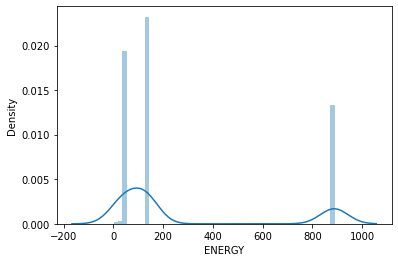

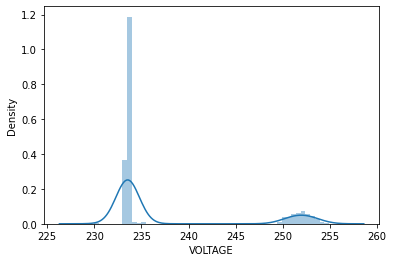

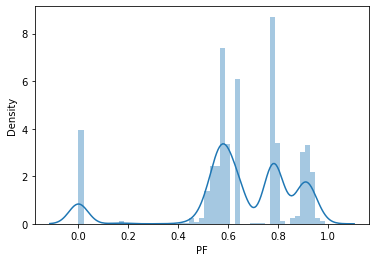

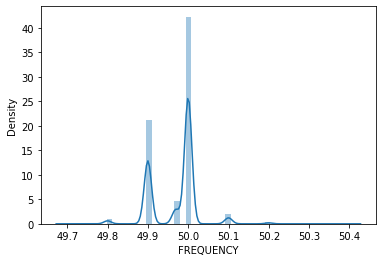

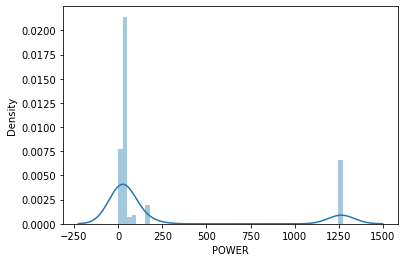

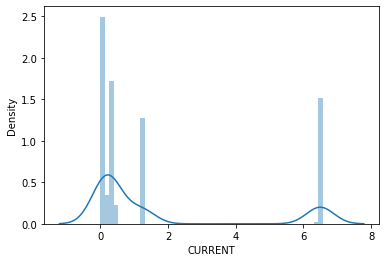

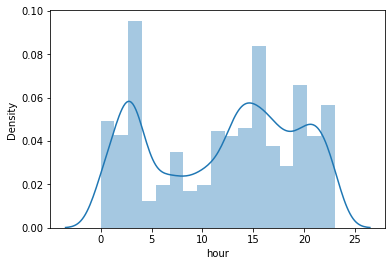

In [79]:
# univariate Analysis along Diffrent variable

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

for i in concatenated_df.select_dtypes(include=np.number).columns:
    sns.distplot(concatenated_df[i])
    plt.show()

In [23]:
concatenated_df.describe().T


,count,mean,std,min,25%,50%,75%,max
ENERGY,8600.0,276.224207,341.633794,1.07,41.07,128.45,128.60,889.05
VOLTAGE,8600.0,237.429012,7.545024,230.00,233.60,233.60,233.60,254.90
PF,8600.0,0.647087,0.234519,0.00,0.58,0.64,0.79,0.99
FREQUENCY,8600.0,49.969203,0.056070,49.70,49.90,50.00,50.00,50.40
POWER,8600.0,241.243942,461.345823,0.00,27.90,28.00,66.30,1272.30
CURRENT,8600.0,1.652086,2.475610,0.00,0.12,0.37,1.23,6.57
hour,8600.0,10.403256,6.393132,0.00,5.00,10.00,16.00,23.00


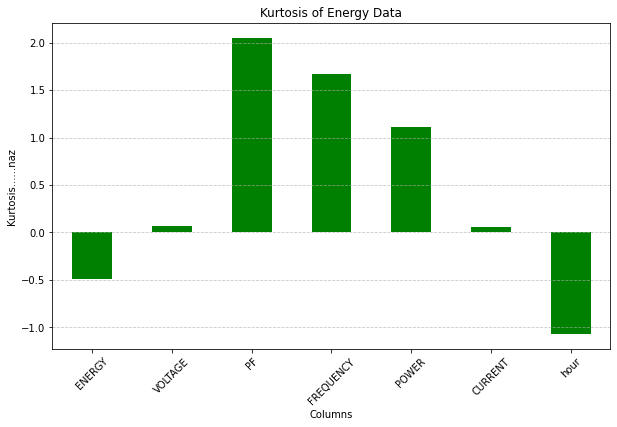

In [16]:

# Calculate kurtosis for each column
kurtosis_values = concatenated_df.kurtosis()

# Plotting
plt.figure(figsize=(10, 6))
kurtosis_values.plot(kind='bar', color='Green')
plt.title('Kurtosis of Energy Data')
plt.xlabel('Columns')
plt.ylabel('Kurtosis......naz')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Comments: Kurtosis < 3 (Platykurtic): A distribution with kurtosis less than 3 is referred to as platykurtic. It indicates that the distribution has lighter tails and is less peaked than a normal distribution. In data analytics, this could suggest that the distribution has fewer extreme values and is more spread out compared to a normal distribution.

outlier Treatemnt is not Required!

Kurtosis is a statistical measure used in data analytics to describe the shape, or peakedness, of a probability distribution. It quantifies how much a distribution deviates from a normal distribution in terms of the tails. In data analytics, kurtosis can provide insights into the presence of outliers or the presence of heavy tails in the distribution.

There are different formulations of kurtosis, but one common definition is based on the fourth central moment of a distribution.



Here's what different values of kurtosis can indicate in data analytics:

Kurtosis > 3 (Leptokurtic): A distribution with kurtosis greater than 3 is said to be leptokurtic. It indicates that the distribution has heavy tails and is more peaked than a normal distribution. This suggests that the distribution has more extreme values (both high and low) than would be expected in a normal distribution. In data analytics, this could indicate the presence of outliers or a more concentrated distribution of data points around the mean.

Kurtosis = 3 (Mesokurtic): A distribution with kurtosis equal to 3 is called mesokurtic. This means that the distribution has the same kurtosis as a normal distribution. The tails are similar to those of a normal distribution, and the distribution is moderately peaked.

Kurtosis < 3 (Platykurtic): A distribution with kurtosis less than 3 is referred to as platykurtic. It indicates that the distribution has lighter tails and is less peaked than a normal distribution. In data analytics, this could suggest that the distribution has fewer extreme values and is more spread out compared to a normal distribution.

When analyzing kurtosis in data analytics, it's important to consider the context of the data and the objectives of the analysis. High kurtosis values may suggest the need for further investigation into outliers or non-normality in the data distribution. Additionally, kurtosis can be used as a tool for selecting appropriate statistical techniques or models for data analysis.




Univariate analysis involves examining a single variable at a time. Below are the typical steps involved in performing univariate analysis:

Load the Data: Load your dataset into a suitable data structure, such as a pandas DataFrame in Python.

Understand the Variable: Gain an understanding of the variable you're analyzing. This includes understanding its definition, units, and potential range of values.

Handle Missing Values: Check for missing values in the variable and decide on an appropriate method for handling them, such as imputation or removal.

Descriptive Statistics:

Calculate basic descriptive statistics, including measures of central tendency (mean, median, mode) and measures of dispersion (range, standard deviation, variance).
Explore additional statistics such as skewness and kurtosis to understand the shape of the distribution.
Visualize the Data:

Create visualizations such as histograms, box plots, and density plots to understand the distribution of the variable.
Choose appropriate visualization techniques based on the nature of the variable (e.g., continuous, categorical).
Identify Outliers:

Determine if there are outliers or extreme values in the variable that may affect the analysis.
Use statistical methods (e.g., Z-score, IQR) to identify outliers.
Transformations:

Explore transformations (e.g., log transformation) if the variable exhibits skewness or non-normality to make the distribution more symmetric.
Analyze Trends (if applicable):

If the variable is time-series data, analyze trends over time using line plots or other time-series visualization techniques.
Look for seasonality or patterns in the data.
Make Inferences:

Based on the descriptive statistics, visualizations, and any additional analyses, make inferences about the variable's characteristics and behavior.
Consider how the findings relate to the overall objectives of the analysis.
Document Findings:

Document the results of the univariate analysis, including any insights gained, decisions made regarding data handling, and conclusions drawn from the analysis.
Clearly communicate findings to stakeholders or colleagues as needed.

<Figure size 864x576 with 0 Axes>

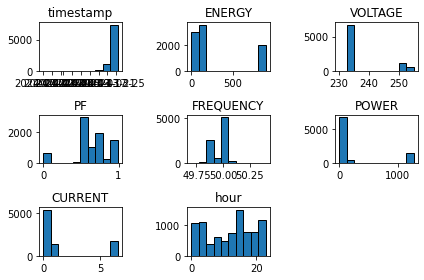

In [82]:
plt.figure(figsize=(12, 8))
concatenated_df.hist(bins=10, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

Error: An unexpected error occurred: ufunc 'log1p' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


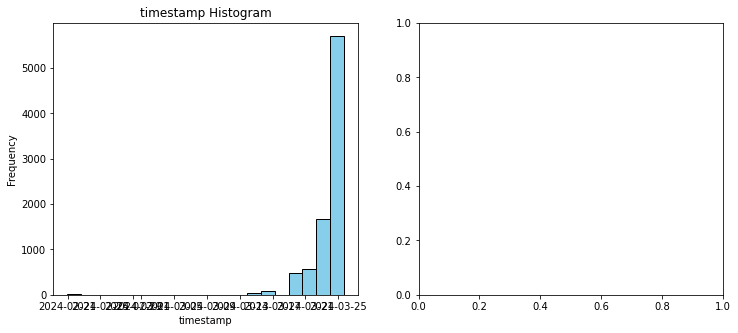

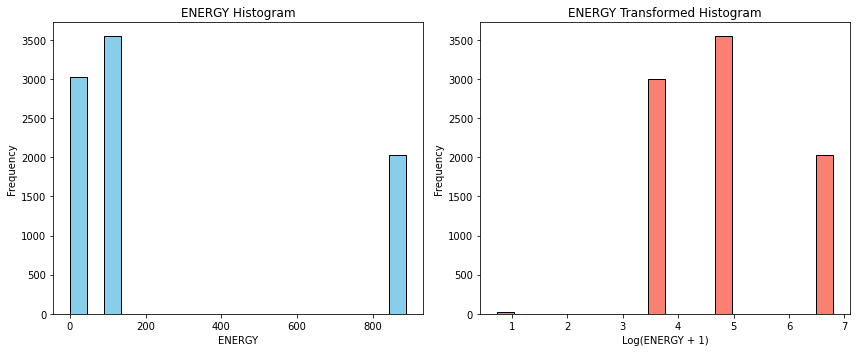

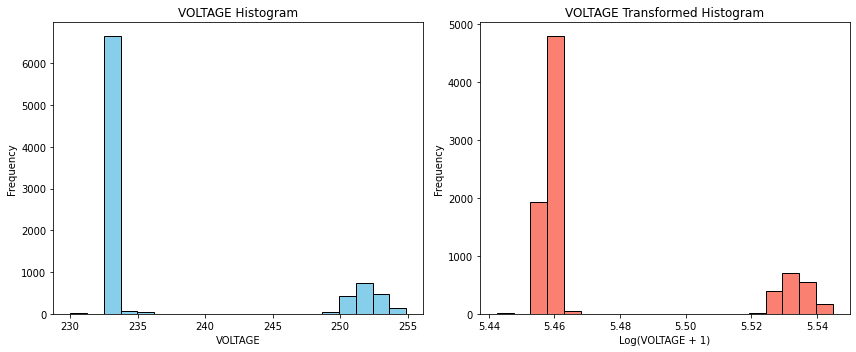

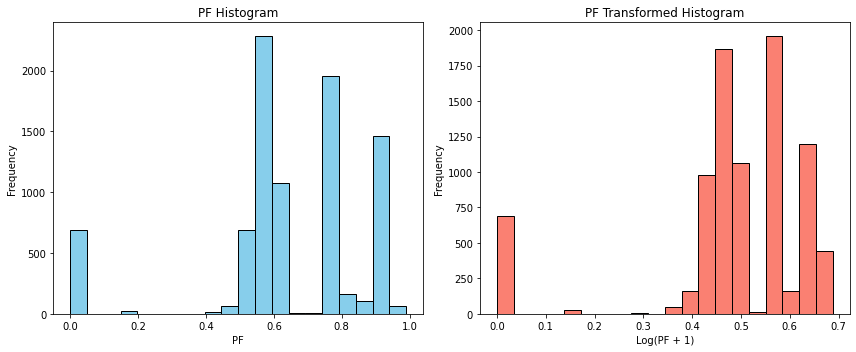

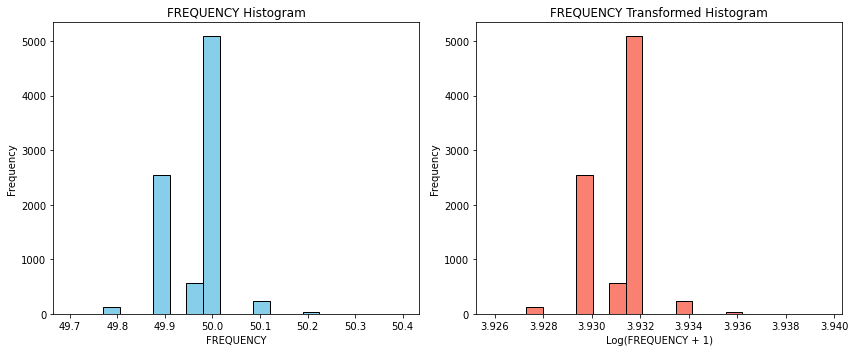

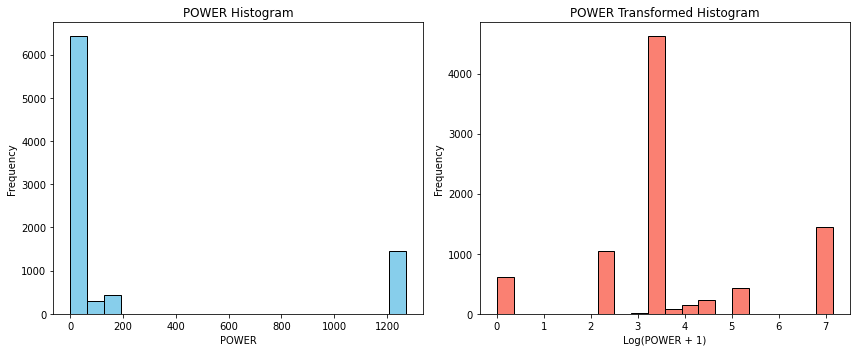

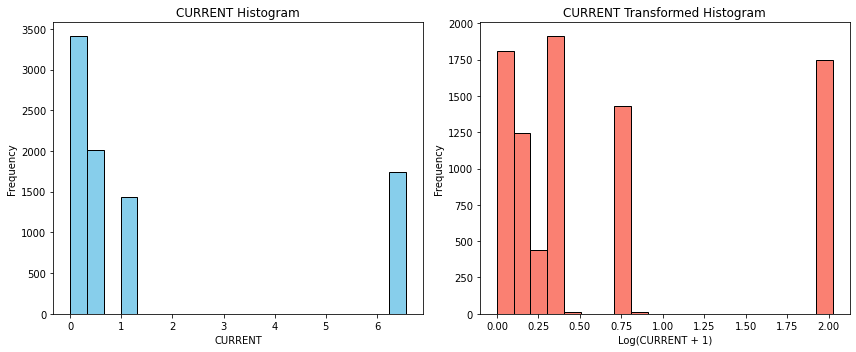

Error: An unexpected error occurred: loop of ufunc does not support argument 0 of type str which has no callable log1p method


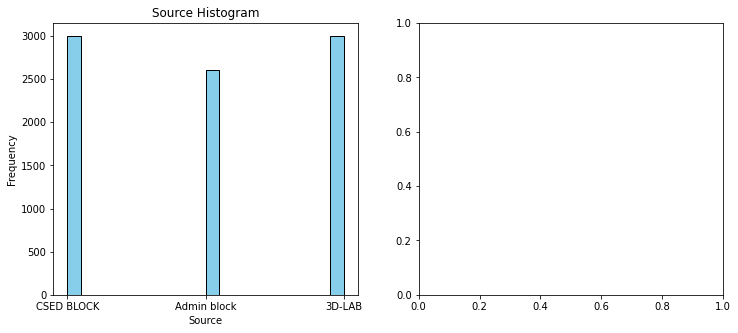

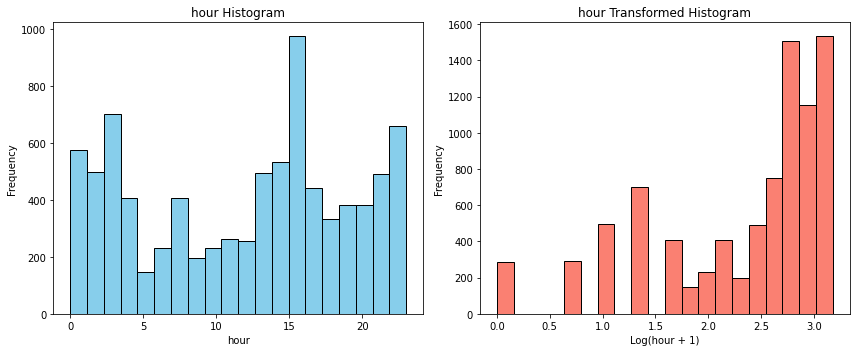

In [83]:
#If You want Transformation :
#if the variable exhibits skewness or non-normality to make the 
#distribution more symmetric.

# Function to plot histogram and transformed histogram
def plot_histograms(data, column):
    try:
        # Plot original histogram
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'{column} Histogram')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Plot histogram after transformation (log transformation in this example)
        plt.subplot(1, 2, 2)
        transformed_data = np.log1p(data[column])  # Applying log transformation
        plt.hist(transformed_data, bins=20, color='salmon', edgecolor='black')
        plt.title(f'{column} Transformed Histogram')
        plt.xlabel(f'Log({column} + 1)')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
        
    
    except KeyError as e:
            print(f"Error: Column '{column}' not found in the dataset.")
    except Exception as e:
            print(f"Error: An unexpected error occurred: {str(e)}")

# Plot histograms and transformed histograms for each column
for col in concatenated_df.columns:
    plot_histograms(concatenated_df, col)

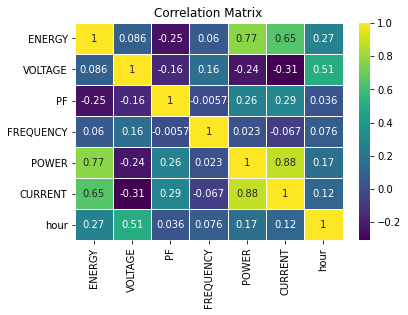

In [84]:
# heatmap 

df =concatenated_df
sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

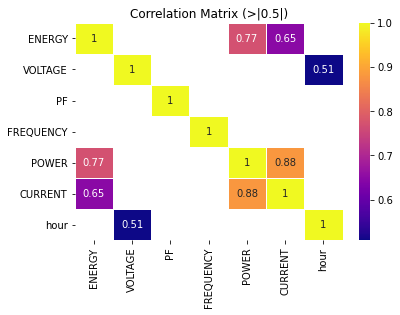

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8600 entries, 2024-03-25 21:58:56 to 2024-03-23 18:35:47
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8600 non-null   datetime64[ns]
 1   ENERGY     8600 non-null   float64       
 2   VOLTAGE    8600 non-null   float64       
 3   PF         8600 non-null   float64       
 4   FREQUENCY  8600 non-null   float64       
 5   POWER      8600 non-null   float64       
 6   CURRENT    8600 non-null   float64       
 7   Source     8600 non-null   object        
 8   hour       8600 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 671.9+ KB


In [85]:
mask = (df.corr() > 0.5)


filtered_correlation_matrix = df.corr().where(mask)


sns.heatmap(filtered_correlation_matrix, annot=True, cmap="plasma", linewidths=.5)
plt.title("Correlation Matrix (>|0.5|)")
plt.show()
df.info()

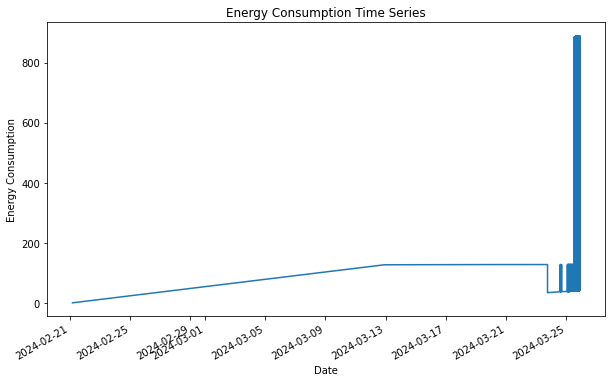

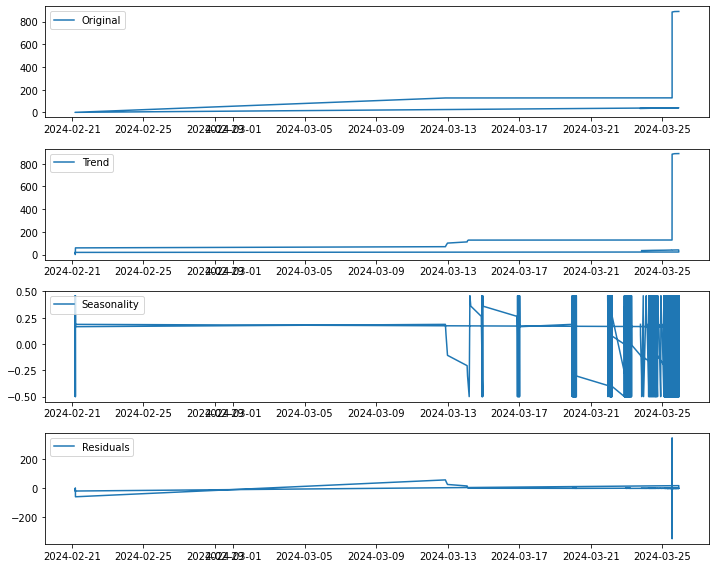

In [86]:
# Time series analysis to find a recurring pattern

 #Visualize the time series
from statsmodels.tsa.seasonal import seasonal_decompose

df['ENERGY'].plot(figsize=(10, 6))
plt.title('Energy Consumption Time Series')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['ENERGY'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['ENERGY'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

CONCLUSION: Above analytics on usage pattern analytics which Answers on following:

What are the peak hours of energy consumption for single-phase users?
How does energy usage vary throughout the day, week, or month for single-phase consumers?
Are there any recurring patterns or trends in energy consumption among single-phase users?
How does energy usage differ between weekdays and weekends for single-phase consumers?


In [5]:
#data Fetch realtime from Thingworx   and tariff generation

import requests
def calculate_bill(units):
    slab1_rate = 4.41
    slab2_rate = 9.64
    slab3_rate = 13.61

    # Slab boundaries
    slab1_limit = 100
    slab2_limit = 300
    slab3_limit = 500

    # Calculate bill based on different slabs
    if units <= slab1_limit:
        bill = units * slab1_rate
    elif units <= slab2_limit:
        bill = (slab1_limit * slab1_rate) + ((units - slab1_limit) * slab2_rate)
    elif units <= slab3_limit:
        bill = (slab1_limit * slab1_rate) + ((slab2_limit - slab1_limit) * slab2_rate) + ((units - slab2_limit) * slab3_rate)
    else:
        bill = (slab1_limit * slab1_rate) + ((slab2_limit - slab1_limit) * slab2_rate) + ((slab3_limit - slab2_limit) * slab3_rate) + ((units - slab3_limit) * slab3_rate)
    
    return bill 



# Define ThingWorx server details
THINGWORX_HOST = 'http://thingworx.scetngp.com' 
THINGWORX_PORT = '80'  
THINGWORX_USERNAME = 'IIOT33'
THINGWORX_PASSWORD = 'scetngp123456'

# Define ThingWorx entity details (e.g., Thing, Property)
THING_NAME = 'PZEM_SMART_ENERGY1'
PROPERTY_NAME = 'ENERGY'

# Construct the ThingWorx URL
url = f"{THINGWORX_HOST}:{THINGWORX_PORT}/Thingworx/Things/{THING_NAME}/Properties/{PROPERTY_NAME}"

# Set up authentication headers
headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'AppKey': '5b63af49-3dcf-41a7-995c-9b8c1adb624f',  # If required by your ThingWorx configuration
}

# Make a GET request to ThingWorx
response = requests.get(url, auth=(THINGWORX_USERNAME, THINGWORX_PASSWORD), headers=headers)


        

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the data from the response
    data = response.json()
    property_value = data['rows'][0]['ENERGY']  # Adjust as per your response structure

    # Now you can use 'property_value' on your Raspberry Pi
    print("TOTAL ENERGY CONSUMED-kWAh:", property_value)
    pr= (input('enetr prev Reading = '))
    Cr= float (property_value)
    diff=  Cr-float(pr)
    total_bill = calculate_bill(diff)
    print("Electric bill for {} units: ₹{}".format(diff, total_bill))
 
    
else:
    print("Failed to fetch data from ThingWorx. Status code:", response.status_code)


TOTAL ENERGY CONSUMED-kWAh: 1118.17
enetr prev Reading = 1000
Electric bill for 118.17000000000007 units: ₹616.1588000000007


In [88]:
df.columns

Index(['timestamp', 'ENERGY', 'VOLTAGE', 'PF', 'FREQUENCY', 'POWER', 'CURRENT',
       'Source', 'hour'],
      dtype='object')

In [3]:
#anomaly detection......................

import pandas as pd



# Data preprocessing (e.g., handling missing values, data type conversion)

# Feature engineering (e.g., calculating additional metrics)

# Exploratory Data Analysis (EDA)

# Anomaly Detection
# Example: Detect anomalies using z-score for 'Power' column
mean_power = df['POWER'].mean()
std_power = df['POWER'].std()
threshold = 1.5 # Adjust threshold as needed
anomalies = df[(df['POWER'] - mean_power).abs() > threshold * std_power]

# Visualize anomalies
# Example: Plot 'Power' column with detected anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['POWER'], label='POWER')
plt.scatter(anomalies['timestamp'], anomalies['POWER'], color='red', label='Anomalies')
plt.xlabel('timestamp')
plt.ylabel('POWER')
plt.title('Energy Meter Data with Anomalies')
plt.legend()
plt.show()


NameError: name 'df' is not defined

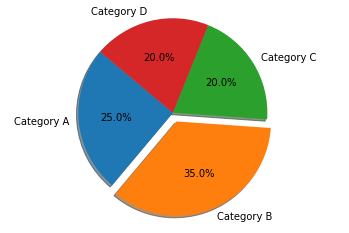

In [5]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [25, 35, 20, 20]  # Proportions of each category
explode = (0, 0.1, 0, 0)  # explode second slice

# Create the pie plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


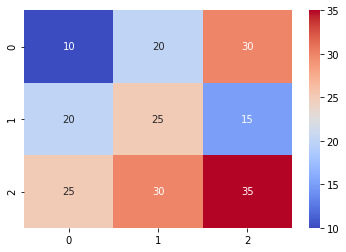

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a sample dataset
data = np.array([[10, 20, 30],
                 [20, 25, 15],
                 [25, 30, 35]])

# Create the heatmap
sns.heatmap(data, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


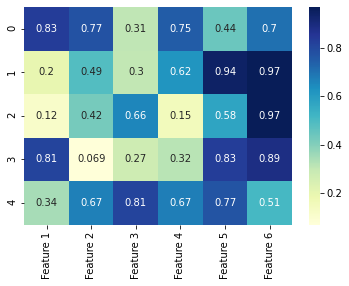

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a sample dataset with 6 features (columns) and 5 rows
data = np.random.rand(5, 6)  # 5 rows, 6 columns with random values between 0 and 1

# Set the feature names for columns
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']

# Create the heatmap
sns.heatmap(data, annot=True, cmap='YlGnBu', xticklabels=features)

# Show the plot
plt.show()


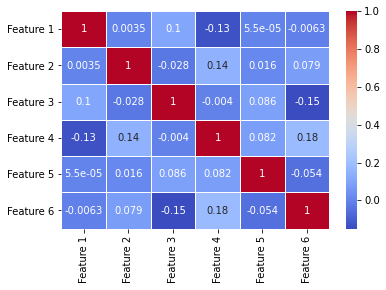

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a sample DataFrame with 6 features
np.random.seed(0)  # For reproducibility
data = pd.DataFrame(np.random.rand(100, 6), columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6'])

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()


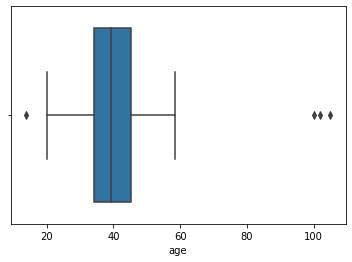

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a sample dataset with "age" as one of the features
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.normal(40, 10, 100).tolist() + [100, 102, 105]  # Some random ages with outliers
})

# Create the box plot
sns.boxplot(x=data['age'])

# Show the plot
plt.show()
